In [178]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [179]:
class MMPP:
    def __init__(self, Q, L):
        self.Q = Q
        self.L = L
        self.list_of_states = range(len(Q))
    
    def __start_state(self):
        QT = self.Q.copy().T
        QT[-1,:] = 1
        F = np.zeros(QT.shape[0])
        F[-1] = 1
        p = np.linalg.solve(QT, F)
        return int(np.random.choice(self.list_of_states, p=p))

    def __next_state(self, current_state, current_time):
        rates = self.Q[current_state].copy()
        v = [np.random.exponential(1/abs(i)) for i in rates]
        v[current_state] = 0
        next_stae = np.argsort(v)[1] # следующее состояние
        T = v[np.argsort(v)[1]] + current_time # время окончания следующего состояния
        return next_state, v[np.argsort(v)[1]] + current_time
    
    def modeling(self, S, start_state):
        current_state = self.__start_state()     # Текущее состояние
        list_of_states = [current_state]    # Список сотояний
        times = [0]     # Время переходов состояний
        events = []     # Моменты времени наступления событий
        state_of_event = []     # Состояния в момент времни настпления событий (ожно вычислить после моделирования, но в процессе проще)
        current_time = 0    # Время последнего состояния 
        s = 0            # Количество событий
        time_of_next_state = np.random.exponential(1/-self.Q[current_state, current_state])
        
        while S > s:
            time_to_next_event = np.random.exponential(1/self.L[current_state]) # Интервал времени до следующего события
            while current_time + time_to_next_event <= time_of_next_state and S > s:
                current_time += time_to_next_event
                events.append(current_time)
                state_of_event.append(current_state)
                s += 1
                time_to_next_event = np.random.exponential(1/self.L[current_state])
                
            current_time = time_of_next_state
            times.append(time_of_next_state)
            '''
            rates = self.Q[current_state].copy()
            rates[current_state] = 0
            current_state = int(np.random.choice(self.list_of_states, p=rates/-self.Q[current_state, current_state]))
            '''
            current_state, time_of_next_state = self.__next_state(current_state=current_state, current_time = current_time)
            list_of_states.append(current_state)
            
            
        return list_of_states, times, events, state_of_event

In [180]:
def gen_Q_L(n1 = 3, n2 = 8, q1 = 0 , q2 = 5, l1 = 0,l2 = 10):
    n = np.random.randint(n1, n2)
    Q = np.zeros((n, n))
    L = np.zeros((n))
    for i in range(n):
        for j in range(n):
            if i != j:
                Q[i,j] = np.random.uniform(q1, q2)
                #Q[i,j] = np.random.randint(q1, q2)
    for i in range(n):
        Q[i,i] = -sum(Q[i,:])
        L[i] = np.random.uniform(l1, l2)
    return Q, L

In [181]:
Q, L = gen_Q_L()
Q, L

(array([[-9.00836212,  4.2244301 ,  4.78393203],
        [ 3.11730515, -5.01754531,  1.90024016],
        [ 1.50194429,  2.22074172, -3.72268601]]),
 array([2.6671204 , 0.61332448, 0.71353219]))

In [182]:
S = 30
mmpp_new = MMPP(Q, L)
states, times, events, state_of_event = mmpp_new.modeling(S=S, start_state= 0)
states[-1] = states[-2]

In [183]:
'''
print(len(states), states)
print(len(times), times)
print(len(events), events)
print(len(state_of_event), state_of_event)
'''

'\nprint(len(states), states)\nprint(len(times), times)\nprint(len(events), events)\nprint(len(state_of_event), state_of_event)\n'

In [184]:
states[-1] = states[-2]
fig = px.line(x = times, y = states, labels={'x': 'Time', 'y': 'State'}, title='MMPP State Transitions', line_shape='hv')
fig.add_scatter(x=events, y=state_of_event, mode='markers', marker=dict(color='red', size=10), name='Event')
fig.update_yaxes(dtick=1)
fig.show()

Q - матрица инфинитизимальных характеристик

Λ - Вектор интенсивностей

V - Вспомогательный вектор (Для выполнения функции np.random.choice(self.list_of_states, p=rates/-self.Q[current_state, current_state]))

S - Максимальное количество событий

n - Количество состояний

k - Текущее состояние (current_state)

T - Текущее время (current_time)

t - Ветор моментов настпуления событий (events)

y - Вспомогательная переменная для прохождения циклом по V

s - Текущее количество событий

η - Время наступления следующего события (time_of_next_state)

τ - Интервал времени до момента наступления следующего события (time_to_next_event)

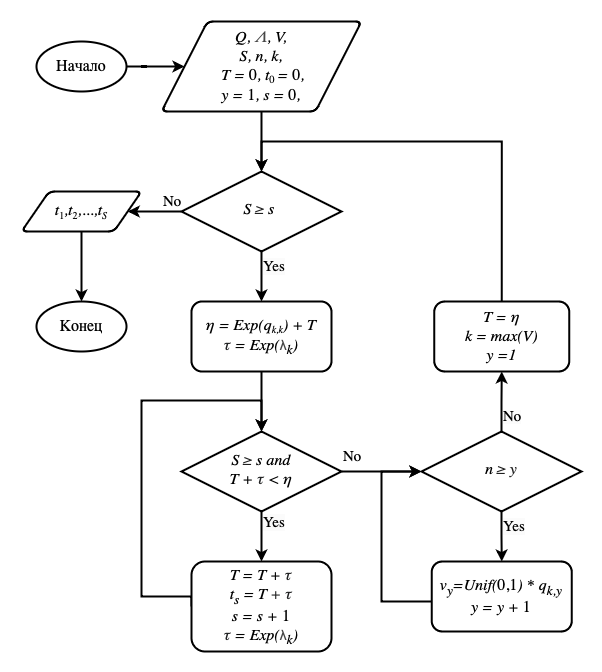